In [1]:
# BY USING NAIVE BAYES CLASSIFIER

In [2]:
from sklearn.naive_bayes import GaussianNB

In [3]:
import pandas as pa
import seaborn as sn

In [4]:
sd=pa.read_csv("E:\\6thSem\\DSDA_Project\\ILPD.csv")

In [5]:
sd.head(3)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [6]:
sd.tail(3)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2


In [7]:
sd.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [8]:
import numpy as np
np.shape(sd)

(583, 11)

In [9]:
# To remove the null values of Alkphos, Method is forward fill
sd['alkphos'].fillna(method='ffill',inplace=True)

In [10]:
sd.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# Creating a dummy cell for the gender column
g0=sd.iloc[0:,1]

In [13]:
f6=LabelEncoder().fit_transform(g0)

In [14]:
sd['gen']=f6

In [15]:
sd.head(3)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gen
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1


In [16]:
x=sd.iloc[0:,[0,2,3,4,5,6,7,8,9,11]]
y=sd.iloc[0:,10]

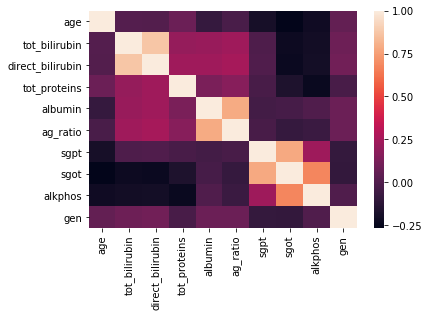

In [17]:
sn.heatmap(x.corr())

In [23]:
#x1=sd.iloc[0:,[0,2,4,5,6,7,9,11]]
#y1=sd.iloc[0:,10]

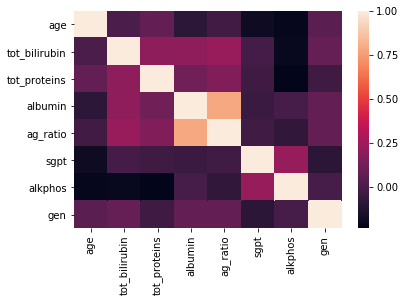

In [24]:
#sn.heatmap(x1.corr())

In [28]:
# Train Test Split of dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=54)

In [29]:
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
# making predictions on the testing set 
y_pred = gnb.predict(x_test) 

In [31]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 67.42857142857143


In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[54 55]
 [ 2 64]]
              precision    recall  f1-score   support

           1       0.96      0.50      0.65       109
           2       0.54      0.97      0.69        66

   micro avg       0.67      0.67      0.67       175
   macro avg       0.75      0.73      0.67       175
weighted avg       0.80      0.67      0.67       175



In [27]:
#Code to get the max value of random state
score=[]
import numpy as np
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    gb=gnb.fit(x_train,y_train)
    score.append(gb.score(x_test,y_test))
i=score.index(np.max(score))
print("Best random state is",i)

Best random state is 54
